In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.visualization import astropy_mpl_style
import os
from astropy.io import fits
from csv import writer

In [ ]:
def get_spectra(fitsfile):
    "function to get the spectra from a fits file"
    img_data, img_header = fits.getdata(fitsfile, header=True)
    cdelta1 = img_header['CDELT1']
    crval1  = img_header['CRVAL1']
    npoints = img_header['NAXIS1']
    ll = np.arange(0,npoints)*cdelta1+crval1
    return ll, img_data

In [3]:
def plot_spectra(fitsfile):
    "function to plot in python the spectra" 
    ll, img_data = get_spectra(fitsfile)
    plt.plot(ll,img_data)
    plt.title(fitsfile)
    #plt.savefig(fitsfile, format='fits')
    plt.show()
    
    return fitsfile

In [4]:
spectra_list = os.listdir('/home/spec/WORK/PEEC2024/spectra_vsin2_4')

In [5]:
for s in spectra_list:
    
    with open('stars_information.csv', 'a') as f_object:
 
        # Pass this file object to csv.writer()
        # and get a writer object
    
        writer_object = writer(f_object)
 
        # Pass the list as an argument into
        # the writerow()
        writer_object.writerow([s])
 
        # Close the file object
        f_object.close()

In [6]:
import urllib
import pandas as pd
import numpy as np
from astropy import coordinates as coord
from astropy import units as u

In [7]:
#loading as a astropy Table:
from astropy.table import Table
from astropy.io.ascii import convert_numpy
sweetCat_table_url = "https://sweetcat.iastro.pt/catalog/SWEETCAT_Dataframe.csv"
converters={'gaia_dr2': [convert_numpy(np.int64)],'gaia_dr3': [convert_numpy(np.int64)] }
T = Table.read(sweetCat_table_url, encoding='UTF-8',format='csv', converters=converters)
print(T.colnames)

['Name', 'hd', 'RA', 'DEC', 'Vmag', 'eVmag', 'PlxFlag', 'Teff', 'eTeff', 'Logg', 'eLogg', 'Vt', 'eVt', '[Fe/H]', 'e[Fe/H]', 'Reference', 'Link', 'SWFlag', 'Update', 'Comment', 'Database', 'gaia_dr2', 'gaia_dr3', 'Plx', 'ePlx', 'Gmag', 'eGmag', 'RPmag', 'eRPmag', 'BPmag', 'eBPmag', 'FG', 'eFG', 'G_flux_std_n', 'Logg_gaia', 'eLogg_gaia', 'Mass_t', 'eMass_t', 'Radius_t', 'eRadius_t', 'spec_base', 'Distance', 'RA_EU', 'DEC_EU', 'RA_NASA', 'DEC_NASA', 'Distance_b', 'eDistance_b']


In [8]:
T

Name,hd,RA,DEC,Vmag,eVmag,PlxFlag,Teff,eTeff,Logg,eLogg,Vt,eVt,[Fe/H],e[Fe/H],Reference,Link,SWFlag,Update,Comment,Database,gaia_dr2,gaia_dr3,Plx,ePlx,Gmag,eGmag,RPmag,eRPmag,BPmag,eBPmag,FG,eFG,G_flux_std_n,Logg_gaia,eLogg_gaia,Mass_t,eMass_t,Radius_t,eRadius_t,spec_base,Distance,RA_EU,DEC_EU,RA_NASA,DEC_NASA,Distance_b,eDistance_b
str29,str8,str11,str12,float64,float64,str8,float64,float64,float64,float64,float64,float64,float64,float64,str42,str112,int64,str10,str35,str7,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str40,float64,float64,float64,float64,float64,float64,float64
11 Com,107383,12 20 43.02,+17 47 34.33,4.74,0.02,GAIAeDR3,4824.0,28.0,2.53,0.09,1.48,0.03,-0.26,0.02,Sousa et al. 2021,https://ui.adsabs.harvard.edu/abs/2021arXiv210904781S/abstract,1,2021-01-01,--,"EU,NASA",3946945413106333696,3946945413106333696,10.1677,0.1365,4.4373,0.0029,3.7715,0.0046,4.9591,0.003,316300000.0,270900.0,0.0142562,2.396255611746718,0.0158830917888943,2.586983174571127,0.0220003678346113,17.168076035374188,0.5624503051374177,11Com_HARPSS_115000_378_691_2020,98.3506594411716,185.1791667,17.792777800000003,185.1787793,17.7932516,97.9758759,1.3001404000000036
11 UMi,136726,15 17 05.88,+71 49 26.04,5.01,0.01,GAIAeDR3,4314.0,93.0,1.82,0.31,1.67,0.09,-0.05,0.04,Sousa et al. 2021,https://ui.adsabs.harvard.edu/abs/2021arXiv210904781S/abstract,1,2021-01-01,--,"EU,NASA",1696798367260229376,1696798367260229376,7.926,0.0874,4.5567,0.0029,3.7446,0.0062,5.2733,0.0031,283300000.0,262200.0,0.0132515,2.0152807045039647,0.0557398887466734,3.034747445422418,0.0325959194092446,25.076026661910657,0.8215258843544753,11UMi_NARVAL_2014,126.167045167802,229.275,71.82388890000001,229.2745954,71.8239428,126.057068,1.3480990000000048
14 And,221345,23 31 17.41,+39 14 10.30,5.22,--,GAIAeDR3,4745.0,38.0,2.52,0.1,1.5,0.04,-0.28,0.03,Sousa et al. 2021,https://ui.adsabs.harvard.edu/abs/2021arXiv210904781S/abstract,1,2021-01-01,--,"EU,NASA",1920113512486282240,1920113512486282240,13.1681,0.0727,4.9222,0.0028,4.2366,0.0045,5.4557,0.0029,202300000.0,110800.0,0.0113062999999999,2.666530786926588,0.0190349773810214,2.020961547844592,0.0144748255018188,11.101348164246616,0.3636957717074285,14And_SOPHIE_HR_2020,75.94110008277579,352.8208333,39.2361111,352.82415,39.2358367,75.8471832,0.4380110999999971
14 Her,145675,16 10 24.31,+43 49 03.52,6.67,--,GAIAeDR3,5360.0,57.0,4.16,0.14,0.94,0.09,0.37,0.04,Sousa et al. 2021,https://ui.adsabs.harvard.edu/abs/2021arXiv210904781S/abstract,1,2021-01-01,--,"EU,NASA",1385293808145621504,1385293808145621504,55.8657,0.0291,6.3952,0.0028,5.8111,0.0038,6.8131,0.0029,52100000.0,9048.0,0.0030675,4.445040579625312,0.0267588009085265,0.939957930643933,0.0141325926888806,1.0216696216954395,0.0334713330304576,14Her_SOPHIE_HR_2020,17.900071063282102,242.5958333,43.8216667,242.6021014,43.816362100000006,17.8923416,0.0102347999999992
16 Cyg B,186427,19 41 51.97,+50 31 03.08,6.2,--,GAIAeDR3,5785.0,23.0,4.37,0.04,1.04,0.03,0.09,0.02,Sousa et al. 2021,https://ui.adsabs.harvard.edu/abs/2021arXiv210904781S/abstract,1,2021-01-01,--,"EU,NASA",2135550755683407232,2135550755683407232,47.3302,0.0171,6.0734,0.0028,5.5746,0.0039,6.4007,0.0029,70080000.0,17930.0,0.0041092,4.358204493747518,0.0096069708081801,1.0223399401784177,0.0067772304252642,1.1509191640247949,0.0377057297311846,16CygB_HARPSN_2020,21.1281591880026,295.4625,50.5175,295.4656422,50.5168243,21.1187477,0.0084534000000005
18 Del,199665,20 58 25.93,+10 50 21.42,5.51,0.01,GAIAeDR3,5089.0,34.0,3.07,0.1,1.37,0.03,0.03,0.03,Sousa et al. 2021,https://ui.adsabs.harvard.edu/abs/2021arXiv210904781S/abstract,1,2021-01-01,--,"EU,NASA",1756741374681702784,1756741374681702784,13.3021,0.0652,5.2693,0.0028,4.6413,0.0041,5.7357,0.0028,147000000.0,61180.0,0.0098169,2.957759500571873,0.0148487989177627,1.9470225357239563,0.0130257343860771,7.670333011243995,0.2512908921064065,18Del_HARPSS_115000_378_691_2020,75.17610

In [13]:
for s in spectra_list:
    star_name = s[0]
    i=1
    while (s[i] != '_' and s[i] != '.'):
        star_name += s[i] 
        i+=1
        
    if s[i+1]=='f' or s[i+1]=='r':
        spectrograph = 'HARPS'
    else:
        spectrograph = ''
        l = np.arange(0,10)
        j = i+1
        while s[j] not in str(l):
            spectrograph += s[j]
            j+=1
    spectrograph = spectrograph.replace('_','')
    #print(spectrograph)
    for k in range(len(T)):
        if T[k][0] == star_name:
            Teff = T[k][7]
            eTeff = T[k][8]
            logg = T[k][9]
            feh = T[k][13]
            efeh = T[k][14]
            vtur = T[k][11]
    fits_name = s.replace('.fits','_rv.fits')
    for i in range (len(inst_list)):
        #print(spectrograph,inst_list[i])
        if inst_list[i][0] in spectrograph:
            instr_broad = find_middle(get_spectra('/home/spec/WORK/PEEC2024/spectra_vsin2_4/'+s)[0])/inst_list[i][1]
    #print(instr_broad)
    List = [star_name,spectrograph,Teff,eTeff,logg,feh,efeh,vtur,instr_broad,fits_name]
    with open('stars_information.csv', 'a') as f_object:
 
        # Pass this file object to csv.writer()
        # and get a writer object
    
        writer_object = writer(f_object)
 
        # Pass the list as an argument into
        # the writerow()
        writer_object.writerow(List)
 
        # Close the file object
        f_object.close()

NameError: name 'Teff' is not defined

In [14]:
inst_list=[['HARPS',115000],['SOPHIEHER',75000],['ESPADONS',65000],['FEROS',48000],['FIES',67000],['NARVAL',65000],['SOPHIE',75000],['SOPHIEHE',40000],['ESPRESSO',140000],['UVES',107200]]

In [15]:
def find_middle(lst):
    #if not lst:  # Check if the list is empty
     #   return "The list is empty."
 
    length = len(lst)  # Get the length of the list
 
    if length % 2 != 0:  # Check if the length is odd
        middle_index = length // 2
        return lst[middle_index]
 
    # If the length is even
    first_middle_index = length // 2 - 1
    second_middle_index = length // 2
    return (lst[first_middle_index]+lst[second_middle_index])/2

--------------------------------------

In [89]:
Results = np.array(pd.read_csv("/home/spec/WORK/PEEC2024/results_simulations.csv"))

In [90]:
names = []
vrots = []
evrots = []
for i in range(len(Results)):
    if (Results[i][5]) > 0:
        if Results[i][0] not in names:
            names.append(Results[i][0])
            vrots.append(Results[i][5])
            evrots.append(Results[i][9])
#names,vrots

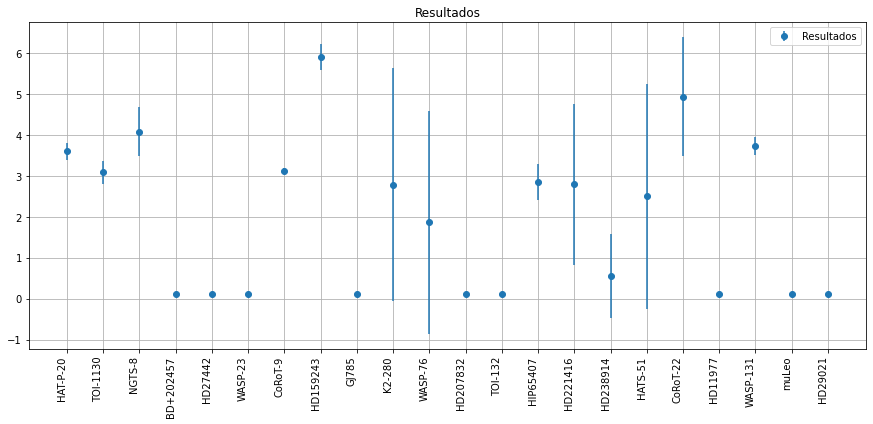

In [91]:
fig, ax = plt.subplots(figsize=(15, 6))
#plt.figure(figsize=(15, 6))
ax.errorbar(names,vrots,yerr=evrots, fmt="o",label="Resultados")
plt.plot(names,vrots, '.')
plt.xticks(rotation=90, ha='right')
plt.legend()
plt.title('Resultados')
plt.grid()

plt.show()

In [85]:
L = pd.read_csv("/home/spec/WORK/PEEC2024/literature_results.csv")
L

,star,vsini,err1,err2,com
0,TYC-3667-1280-1,3.20,0.40,-0.40,NaN
1,HAT-P-20,2.10,0.50,-0.50,NaN
2,TOI-1130,4.00,0.50,-0.50,NaN
3,NGTS-8,3.56,0.67,-0.67,NaN
4,BD+202457,2.50,0.00,0.00,NaN
...,...,...,...,...,...
131,HD109271,2.70,0.00,0.00,------
132,WASP-64,3.40,0.80,-0.80,NaN
133,HD202206AB,2.30,0.50,-0.50,NaN
134,HD28254,2.50,1.00,-1.00,NaN


In [77]:
Literature = [[],[],[]]
#Literaturevel=np.zeros((2,92))
for i in range(len(L)):
    Literature[0].append(str(L['star'][i]))
    Literature[1].append(float(L['vsini'][i]))
    Literature[2].append(float(L['err1'][i]))

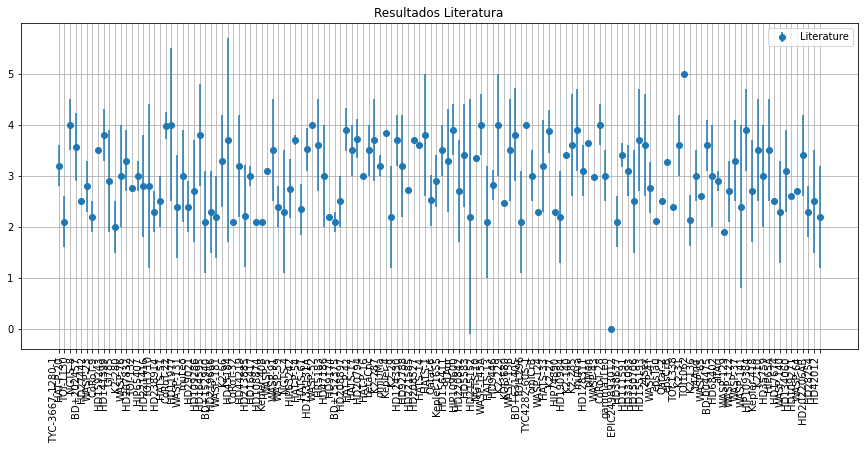

In [78]:
fig, ax = plt.subplots(figsize=(15, 6))
#plt.figure(figsize=(15, 6))
ax.errorbar(Literature[0],Literature[1],yerr=Literature[2], fmt="o",label="Literature")
#ax.errorbar(names,vrots,yerr=evrots, fmt="o",label="MOOG")
plt.plot(Literature[0],Literature[1], '.')
plt.xticks(rotation=90, ha='right')
plt.legend()
plt.title('Resultados Literatura')
plt.grid()

plt.show()

In [92]:
diff = [[],[],[]]
for i in range(len(Literature[0])):
    for j in range(len(names)):
        if Literature[0][i] == names[j]:
            #print(Literature[0][i],names[j])
            diff[0].append(names[j])
            diff[1].append(vrots[j]-Literature[1][i])
            diff[2].append(np.sqrt(evrots[j]**2+Literature[2][i]**2))

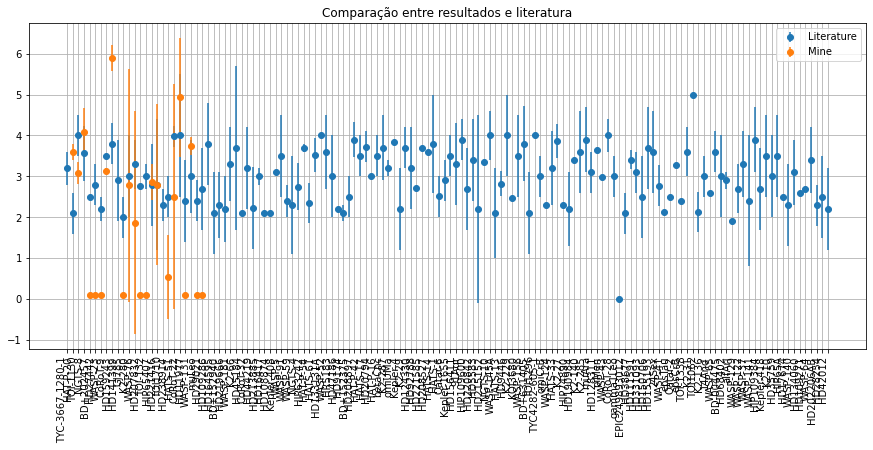

In [93]:
fig, ax = plt.subplots(figsize=(15, 6))
#plt.figure(figsize=(15, 6))
ax.errorbar(Literature[0],Literature[1],yerr=Literature[2], fmt="o",label="Literature")
ax.errorbar(names,vrots,yerr=evrots, fmt="o",label="Mine")
#plt.plot(diff[0],diff[1], '.')
plt.xticks(rotation=90, ha='right')
plt.legend()
plt.title('Comparação entre resultados e literatura')
plt.grid()

plt.show()

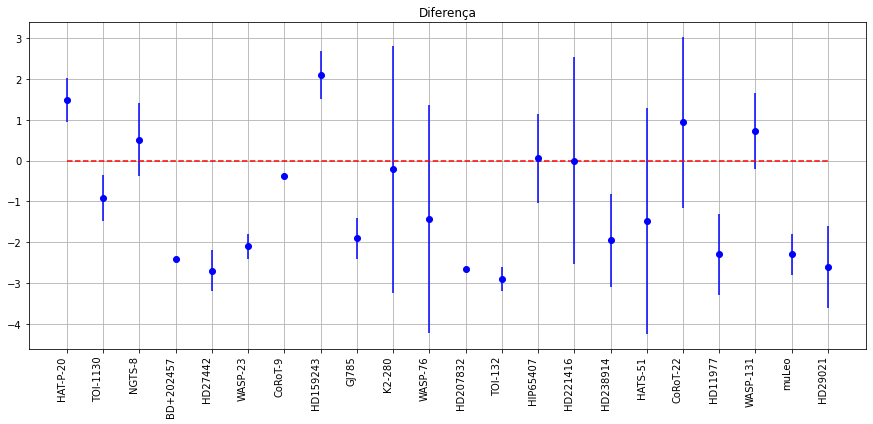

In [94]:
fig, ax = plt.subplots(figsize=(15, 6))
plt.grid()
#ax.errorbar(diff[0][:64],diff[1][:64],yerr=diff[2][:64], fmt="bo")
#ax.errorbar(diff[0][65:],diff[1][65:],yerr=diff[2][65:], fmt="bo")
ax.errorbar(diff[0],diff[1],yerr=diff[2], fmt="bo")
plt.xticks(rotation=90, ha='right')
plt.plot(diff[0],np.zeros(len(diff[0])), 'r--')
#plt.ylim(min(diff[1])-1,10)
#plt.legend()
plt.title('Diferença')
plt.show()